In [ ]:
!pip install -r ../requirements.txt

In [1]:
import os
import numpy as np
import nltk
import pandas as pd
import json
from tqdm import tqdm
from matplotlib import pyplot as plt
import seaborn as sns

from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize 
from nltk.stem import WordNetLemmatizer
from autocorrect import Speller
from bs4 import BeautifulSoup
from nltk.corpus import stopwords 
from nltk import word_tokenize
import string
import json
import unidecode 
import re

import warnings
warnings.filterwarnings('ignore')

nltk.download('wordnet')
nltk.download('punkt')
nltk.download('omw-1.4')

[nltk_data] Downloading package wordnet to /Users/kian/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package punkt to /Users/kian/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package omw-1.4 to /Users/kian/nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!


True

## --------------------------- Reading and Preprocessing data ---------------------------

In [58]:
from preprocessing import Preprocessor


class DataReader:
    def __init__(self, read_from_excels=False):
        preprocessor = Preprocessor()
        if read_from_excels:
            dfs = []
            for file in tqdm(os.listdir("../Excels")):
                df = pd.read_excel(os.path.join("../Excels", file))
                dfs.append(df)
            df = pd.concat(dfs)
            
            df = df[df['Language'] == 'en']
            df.reset_index(drop=True, inplace=True)
            df.drop_duplicates(subset="Text", keep='first', inplace=True, ignore_index=True)
            df = preprocessor.perform_clean_lemmatize_tokenize(df)
            idx = df.Text_words.apply(len) > df.Text_words.apply(len).describe()["25%"]
            df = df[idx]
            
            df["Text_words_joined"] = df.Text_words.apply(lambda x: " ".join(x))
            df.drop_duplicates(subset="Text_words_joined", keep='first', inplace=True, ignore_index=True)
            self.df = df
            
        else:
            df = pd.read_csv("../data_final.csv")
            df["Text_words"] = df.Text_words_joined.apply(lambda x: x.split(" "))
            self.df = df

       
            
data_reader = DataReader(read_from_excels=False)
df = data_reader.df

[nltk_data] Downloading package stopwords to /Users/kian/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [59]:
df.head()

,Unnamed: 0,Tweet Id,Text,cleaned_tweets,lemmatized_tweets,Text_words_joined,Text_words
0,0,1547201923266351106,RT @JonJonesSnr : Labour accuses No 10 of 'flagrant abuse of power' after it refuses to allow a no-confidence debate in government tomorrow.\n\nIt...,labour accuses flagrant abuse power refuses allow noconfidence debate government tomorrow official live dictatorship,labour accuse flagrant abuse power refuse allow noconfidence debate government tomorrow official live dictatorship,labour accuse flagrant abuse power refuse allow noconfidence debate government tomorrow official live dictatorship,"[labour, accuse, flagrant, abuse, power, refuse, allow, noconfidence, debate, government, tomorrow, official, live, dictatorship]"
1,1,1547201914525421569,@DonaldJTrumpJr Unbelievable. Closing down the debate by saying it opens up trans people to violence. It’s so manipulative.,unbelievable closing debate saying opens trans people violence manipulative,unbelievable close debate say open trans people violence manipulative,unbelievable close debate say open trans people violence manipulative,"[unbelievable, close, debate, say, open, trans, people, violence, manipulative]"
2,2,1547201911853572096,"Isn’t it funny how once the internet learned logical fallacy terminology, people started acting like social media was a formal debate stage? \n\nI...",funny internet learned logical fallacy terminology people started acting like social media formal debate stage care know meaning term ad hominem a...,funny internet learn logical fallacy terminology people start act like social media formal debate stage care know mean term ad hominem act like gd...,funny internet learn logical fallacy terminology people start act like social media formal debate stage care know mean term ad hominem act like gd...,"[funny, internet, learn, logical, fallacy, terminology, people, start, act, like, social, media, formal, debate, stage, care, know, mean, term, ad..."
3,3,1547201910670823426,"@MoeedNj You're right, Moeed. Political rhetoric par excellence from Imran Khan. But it does have implications. It dumbifies foreign policy debate...",right moeed political rhetoric par excellence imran khan implications dumbifies foreign policy debate misleads public feeds extremism better forei...,right moeed political rhetoric par excellence imran khan implications dumbifies foreign policy debate mislead public feed extremism better foreign...,right moeed political rhetoric par excellence imran khan implications dumbifies foreign policy debate mislead public feed extremism better foreign...,"[right, moeed, political, rhetoric, par, excellence, imran, khan, implications, dumbifies, foreign, policy, debate, mislead, public, feed, extremi..."
4,4,1547201898884878336,RT @BryanDBender : JUST IN: UFO amnesty provision proposed by @RepGallagher and @RubenGallego in order by House Rules Committee tonight for House ...,ufo amnesty provision proposed order house rules committee tonight house debate week national defense authorization act week reports,ufo amnesty provision propose order house rule committee tonight house debate week national defense authorization act week report,ufo amnesty provision propose order house rule committee tonight house debate week national defense authorization act week report,"[ufo, amnesty, provision, propose, order, house, rule, committee, tonight, house, debate, week, national, defense, authorization, act, week, report]"


In [60]:
df.Text_words.apply(len).describe()

count    26558.000000
mean        17.328338
std          5.834983
min          9.000000
25%         12.000000
50%         17.000000
75%         22.000000
max         49.000000
Name: Text_words, dtype: float64

In [61]:
df.Text_words.explode().value_counts().head(10)

get          2998
developer    2414
us           2377
new          2143
like         2049
people       2023
say          1985
go           1969
make         1917
war          1892
Name: Text_words, dtype: int64

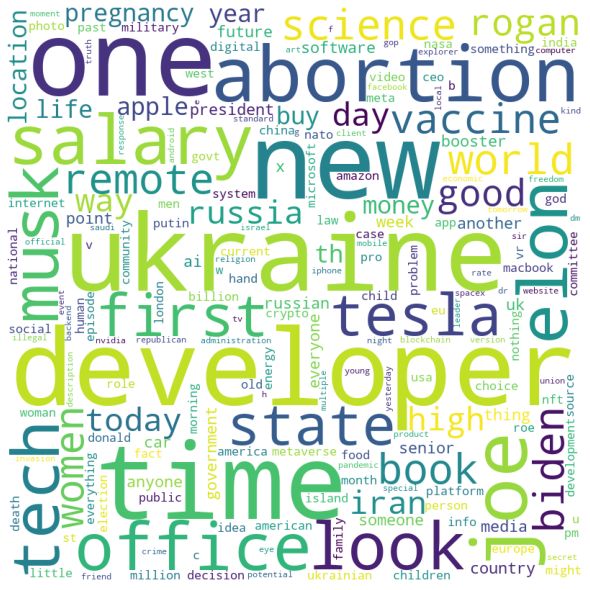

In [19]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

all_words = " ".join(set(df['Text_words'].explode()) - {np.nan})
all_words = " ".join(df['Text_words'].explode().value_counts().reset_index()['index'])
wordcloud = WordCloud(width = 800, height = 800,
                background_color ='white',
                min_font_size = 10).generate(all_words)
 
# plot the WordCloud image                      
plt.figure(figsize = (8, 8), facecolor = None)
plt.imshow(wordcloud)
plt.axis("off")
plt.tight_layout(pad = 0)
 
plt.show()

In [20]:
nltk.FreqDist(df['Text_words'].explode()).most_common(20)

[('get', 2998),
 ('developer', 2414),
 ('us', 2377),
 ('new', 2143),
 ('like', 2049),
 ('people', 2023),
 ('say', 1985),
 ('go', 1969),
 ('make', 1917),
 ('war', 1892),
 ('would', 1740),
 ('back', 1661),
 ('trump', 1653),
 ('work', 1609),
 ('one', 1590),
 ('ukraine', 1561),
 ('time', 1549),
 ('know', 1442),
 ('use', 1428),
 ('need', 1358)]

## TF-IDF Search ---------------------------

In [25]:
import pandas as pd
import numpy as np
import re
from sklearn.feature_extraction.text import TfidfVectorizer

class TFIDFSearch:
    def __init__(self):
        self.preprocessor = Preprocessor()
        self.vocabulary = list(set(df['Text_words'].explode()) - {np.nan})

        self.tfidf = TfidfVectorizer(vocabulary=self.vocabulary)
        self.tfidf_tran=self.tfidf.fit_transform(df['Text_words'].apply(lambda x: ' '.join(x)))

    def get_vector(self, tokens):
        result = np.zeros((len(self.vocabulary)))
        x = self.tfidf.transform(tokens)
        for token in tokens:
            try:
                ind = self.vocabulary.index(token)
                result[ind]  = x[0, self.tfidf.vocabulary_[token]]
            except Exception as e:
                print(e)
                pass
        return result

    @staticmethod
    def cosine_sim(a, b):
        norm_a = np.linalg.norm(a)
        norm_b = np.linalg.norm(b)
        if norm_a == 0 or norm_b == 0:
            return 0
        cos_sim = np.dot(a, b)/(norm_a*norm_b)
        return cos_sim

    def search(self, k, query):
        tokens = self.preprocessor.clean_query(query)
        tokens = [token for token in tokens if token in self.vocabulary]
        print(tokens)
        q_df = pd.DataFrame(columns=['q_clean'])
        q_df.loc[0, 'q_clean'] = tokens

        d_cosines = []

        query_vector = self.get_vector(tokens)
        print(sum(query_vector))
        for d in self.tfidf_tran.A:
            d_cosines.append(self.cosine_sim(query_vector, d))

        out = np.array(d_cosines).argsort()[-k:][::-1]
        a = pd.DataFrame()
        for i, index in enumerate(out):
            a.loc[i, 'index'] = str(index)
            a.loc[i, 'text'] = df.iloc[index]['Text']
            a.loc[i, 'words'] = str(df.iloc[index]['Text_words'])
            a.loc[i, 'Score'] = d_cosines[int(index)]
        return a

In [30]:
model = TFIDFSearch()
results = model.search(10, "Elon Musk buying twitter")
results

[nltk_data] Downloading package stopwords to /Users/kian/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


['elon', 'musk', 'buy', 'twitter']
1.0


,index,text,words,Score
0,20025,RT @WayneSmithUK71 : @nytimes Elon Musk damage...,"['elon', 'musk', 'damage', 'trust', 'elon', 'm...",0.500485
1,11031,Twitter sues Elon Musk https://t.co/tnmcYXx1cD...,"['twitter', 'sue', 'elon', 'musk', 'elon', 'mu...",0.453855
2,26230,🔥👽 Episode 87 of Elon Musk Radio!\n\nTwitter: ...,"['episode', 'elon', 'musk', 'radio', 'twitter'...",0.453289
3,26054,"I believe elon is a measure of left and right,...","['believe', 'elon', 'measure', 'leave', 'right...",0.448867
4,20202,So Twitter wants to force Elon Musk to buy Twi...,"['twitter', 'want', 'force', 'elon', 'musk', '...",0.425154
5,7368,Elon has his trigger finger in the river. If h...,"['elon', 'trigger', 'finger', 'river', 'fall',...",0.417281
6,7319,@drmistercody My favorite part is the paging E...,"['favorite', 'part', 'page', 'elon', 'like', '...",0.414343
7,20188,@biggestjoel @elonmusk The irony is Twitter su...,"['irony', 'twitter', 'sue', 'elon', 'buy', 'tw...",0.393487
8,7366,@Blockworks_ Some one phone Elon @elonmusk pur...,"['one', 'phone', 'elon', 'purchase', 'btc', 'm...",0.392115
9,7459,@20W24 I don’t listen to Elon Musk… I’m conser...,"['listen', 'elon', 'musk', 'conservative', 'el...",0.379351


## Boolean Search ---------------------------

In [27]:
class BooleanSearch:
    def __init__(self):
        self.preprocessor = Preprocessor()
        self.vocabulary = list(set(df['Text_words'].explode()) - {np.nan})
        self.vocabulary_index = {word: idx for idx, word in enumerate(self.vocabulary)}
        self.mat = np.zeros((len(df), len(self.vocabulary)), )
        for index, row in df.iterrows():
            for token in row['Text_words']:
                self.mat[index][self.vocabulary_index[token]] = 1


    def search(self, k, query):
        tokens = self.preprocessor.clean_query(query)
        query_vector = []
        for token in tokens:
            if token in self.vocabulary_index:
                query_vector.append(self.vocabulary_index[token])
        out = []
        for index, vec in enumerate(self.mat):
            flag = True
            for token_index in query_vector:
                if vec[token_index] == 0:
                    flag = False
                    break
            if flag:
                out.append(index)
            if len(out) == k:
                break
        print(out)
        a = pd.DataFrame()
        for i, index in enumerate(out):
            a.loc[i, 'index'] = str(index)
            a.loc[i, 'text'] = df.iloc[index]['Text']
            a.loc[i, 'words'] = str(df.iloc[index]['Text_words'])

        return a

In [29]:
model = BooleanSearch()
model.search(10, "Elon Musk buying twitter")

[nltk_data] Downloading package stopwords to /Users/kian/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


[7303, 7363, 7369, 7385, 7474, 7526, 7573, 10483, 10761, 10895]


,index,text,words
0,7303,RT @conspiracyb0t : China buying up massive am...,"['china', 'buy', 'massive', 'amount', 'land', ..."
1,7363,RT @MattWallace888 : Rumors are spreading that...,"['rumor', 'spread', 'elon', 'musk', 'go', 'buy..."
2,7369,RT @jimmyfailla : Elon Musk is buying Twitter ...,"['elon', 'musk', 'buy', 'twitter', 'everyone',..."
3,7385,RT @Sana_f2 : #IndiaSuppressingSpeech\nWith El...,"['elon', 'musk', 'strike', 'deal', 'buy', 'twi..."
4,7474,@destroyed4com4t @elonmusk I don't think they ...,"['think', 'fully', 'comprehend', 'elon', 'musk..."
5,7526,RT @BritishGQ : Elon Musk is going to be sorry...,"['elon', 'musk', 'go', 'sorry', 'agree', 'buy'..."
6,7573,scenes when elon musk buys twitter and my 4 ba...,"['scenes', 'elon', 'musk', 'buy', 'twitter', '..."
7,10483,Twitter Sues Tesla CEO Elon Musk for Not buyin...,"['twitter', 'sue', 'tesla', 'ceo', 'elon', 'mu..."
8,10761,RT @SAfmnews : Twitter has fired back at Elon ...,"['twitter', 'fire', 'back', 'elon', 'musk', 'a..."
9,10895,"Twitter Sues Tesla CEO! Elon Musk Says, ‘Oh th...","['twitter', 'sue', 'tesla', 'ceo', 'elon', 'mu..."


## FastText ---------------------------

In [31]:
import fasttext.util

class FastText:
    def __init__(self):
        self.preprocessor = Preprocessor()        
        fasttext.util.download_model('en', if_exists='ignore')  # English
        self.ft = fasttext.load_model("./cc.en.300.bin")
        
        self.text_vectors = []
        self.words_count = []
        for _, row in df.iterrows():
            self.words_count.append(len(row['Text_words']))
            self.text_vectors.append(self.tokens_to_vec(row['Text_words']))

    def tokens_to_vec(self, tokens):
        cur_vectors = []
        if len(tokens) == 0:
            return np.zeros(self.ft.get_dimension())
        for token in tokens:
            cur_vectors.append(self.ft.get_word_vector(token))
        return np.asarray(np.average(cur_vectors, axis=0, keepdims=True))[0]

    @staticmethod
    def cosine_sim(a, b):
        norm_a = np.linalg.norm(a)
        norm_b = np.linalg.norm(b)
        if norm_a == 0 or norm_b == 0:
            return 0
        cos_sim = np.dot(a, b)/(norm_a*norm_b)
        return cos_sim

    def search(self, k, query):
        tokens = self.preprocessor.clean_query(query)
        query_vector = self.tokens_to_vec(tokens)
        d_cosines = []
        print(tokens)
        for idx, d in enumerate(self.text_vectors):
            d_cosines.append(self.cosine_sim(d, query_vector))
            if self.words_count[idx] > 10:
                d_cosines[-1] += 0.2
            elif self.words_count[idx] > 5:
                d_cosines[-1] += 0.1

        out = np.array(d_cosines).argsort()[-k:][::-1]
        a = pd.DataFrame()
        for i, index in enumerate(out):
            a.loc[i, 'index'] = str(index)
            a.loc[i, 'text'] = df.iloc[index]['Text']
            a.loc[i, 'words'] = str(df.iloc[index]['Text_words'])
            a.loc[i, 'Score'] = d_cosines[int(index)]
        return a

In [34]:
# model = FastText()
# model.search(10, "Elon Musk buying twitter")

In [32]:
pd.set_option('display.max_colwidth', 150)

In [10]:
models = [FastText(), BooleanSearch(), TFIDFSearch(), ]

# ---------------------------- Evalutation ----------------------------

In [14]:
class Evaluator:
    queries = [
        "how to became full stack developer",
        "Microsoft Internet Explorer age",
        "Tesla price",
        "Macbook M2 Price",
        "Abortion rights",
        "Ukraine war",
        "Raisi",
        "Harry potter",
        "Covid vaccine",
        "Meta VR"
    ]

    def run(self):
        scores = np.zeros((len(self.queries),len(models)))
        for idxq, query in enumerate(self.queries):
            for idxm, model in enumerate(models):
                result = model.search(10, query)
                for idxr, row in result.iterrows():
                    print("-"*100)
                    print(">", query)
                    print(row['text'])
                    if input("Are result related to query?(y/n)").lower() == 'y':
                        scores[idxq][idxm] = 1/(idxr + 1)
                        break
        self.scores = scores
evaluator = Evaluator()
evaluator.run()

['become', 'full', 'stack', 'developer']
----------------------------------------------------------------------------------------------------
> how to became full stack developer
@TreciaKS You are either a front end or full stack developer coz as a Backend developer I rarely get that urge 😁
Are result related to query?(y/n)n
----------------------------------------------------------------------------------------------------
> how to became full stack developer
RT @YuHelenYu : Roadmap to Full Stack Developer 
#AI #DataSecurity #dataScientist #DataAnalytics #RStats #Reactjs #IIoT #flutter #javascript #java #TensorFlow #Cloud #coding #BigData #5G #MachineLearning  #R #reddit #WomenInSTEM  #fintech #tech #blockchain #DataScience  #100DaysOfCode #Jobs https://t.co/o1ATvNKGn9
Are result related to query?(y/n)y
[5264]
----------------------------------------------------------------------------------------------------
> how to became full stack developer
Be job-ready with Ashwat School. Become

Are result related to query?(y/n)y
['macbook', 'price']
----------------------------------------------------------------------------------------------------
> Macbook M2 Price
And Now This:  Apple M2 iPad Pro series prices leaked along with details about more-responsive iPad mini and laminated iPad - https://t.co/zuY25fN6cg

#technology #tech #technews

Read More Here:
https://t.co/5LewoWNDke
Are result related to query?(y/n)y
[12731, 12938, 12971]
----------------------------------------------------------------------------------------------------
> Macbook M2 Price
C$34.2 - #FreeShipping | Amazing deals at amazing low prices  The Decal Guru Apple Sauce Shot MacBook Decal #TheDecalGuru       👉 https://t.co/CWRarWy6gX       #sharious  #canadianbestseller  #canada #usa #product #1268MAC13XDB  #2016  #Apple  #Decal . https://t.co/srtyxsiB0o
Are result related to query?(y/n)y
['macbook', 'price']
1.0
------------------------------------------------------------------------------------------

Are result related to query?(y/n)y
[7249, 7268, 7351, 7357, 7446, 7458, 7525, 7789, 8205, 11330]
----------------------------------------------------------------------------------------------------
> Meta VR
RT @quantum_input : Meta wants its next VR headset to replace your laptop https://t.co/x6Mf0r5ZNS #Meta #Vr
Are result related to query?(y/n)y
['meta', 'vr']
1.0
----------------------------------------------------------------------------------------------------
> Meta VR
Report: Meta to Release First AR Glasses to Developers Only &amp; Not Consumers #meta #ar #vr #edtech #edtechchat #edchat | @scoopit https://t.co/FXvg88aBxH
Are result related to query?(y/n)y


In [15]:
pd.DataFrame({
    "models": map(lambda x: x.__class__.__name__, models),
    "scores": evaluator.scores.mean(axis=0),
})

,models,scores
0,FastText,0.900000
1,BooleanSearch,0.850000
2,TFIDFSearch,0.766667
